In [29]:
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]


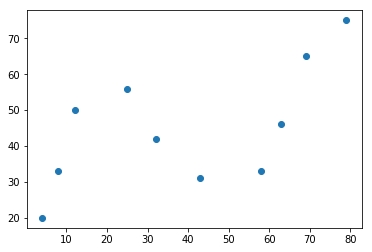

In [30]:
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt

plt.scatter(x, y)


In [31]:
"""实现 2 次多项式函数及误差函数
"""
def func(p, x):
    """根据公式，定义 2 次多项式函数
    """
    w0, w1, w2 = p
    f = w0 + w1*x + w2*x*x
    return f
def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）
    """
    ret = func(p, x) - y
    return ret

In [32]:
import numpy as np
p_init = np.random.randn(3) # 生成 3 个随机数
p_init

array([-0.07446633, -1.190771  , -1.59758988])

In [33]:
from scipy.optimize import leastsq
parameters = leastsq(err_func,p_init,args=(np.array(x),np.array(y)))
print('Fitting Parameters:',parameters[0])

Fitting Parameters: [ 3.76893110e+01 -2.60474091e-01  8.00078014e-03]


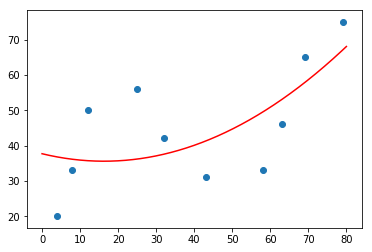

In [34]:
x_temp=np.linspace(0,80,10000)
plt.plot(x_temp,func(parameters[0],x_temp),'r')
plt.scatter(x,y)

In [35]:
"""实现 n 次多项式拟合
"""
def fit_func(p, x):
    """根据公式，定义 n 次多项式函数
    """
    f = np.poly1d(p)
    return f(x)

def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）
    """
    ret = fit_func(p, x) - y
    return ret

def n_poly(n):
    """n 次多项式拟合
    """
    p_init = np.random.randn(n) # 生成 n 个随机数
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]

In [36]:
n_poly(3)

array([ 8.00077958e-03, -2.60474042e-01,  3.76893103e+01])

Text(0.5,1,'m = 8')

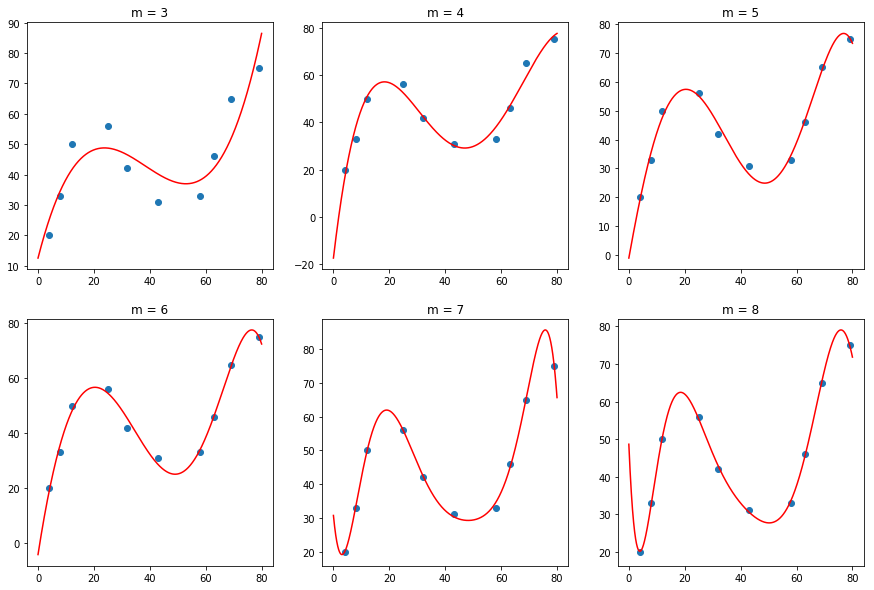

In [37]:
"""绘制出 3，4，5，6，7, 8, 9 次多项式的拟合图像
"""

# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0,0].plot(x_temp, fit_func(n_poly(4), x_temp), 'r')
axes[0,0].scatter(x, y)
axes[0,0].set_title("m = 3")

axes[0,1].plot(x_temp, fit_func(n_poly(5), x_temp), 'r')
axes[0,1].scatter(x, y)
axes[0,1].set_title("m = 4")

axes[0,2].plot(x_temp, fit_func(n_poly(6), x_temp), 'r')
axes[0,2].scatter(x, y)
axes[0,2].set_title("m = 5")

axes[1,0].plot(x_temp, fit_func(n_poly(7), x_temp), 'r')
axes[1,0].scatter(x, y)
axes[1,0].set_title("m = 6")

axes[1,1].plot(x_temp, fit_func(n_poly(8), x_temp), 'r')
axes[1,1].scatter(x, y)
axes[1,1].set_title("m = 7")

axes[1,2].plot(x_temp, fit_func(n_poly(9), x_temp), 'r')
axes[1,2].scatter(x, y)
axes[1,2].set_title("m = 8")

In [38]:
"""使用 PolynomialFeatures 自动生成特征矩阵
"""
from sklearn.preprocessing import PolynomialFeatures

X=[2, -1, 3]
X_reshape = np.array(X).reshape(len(X), 1) # 转换为列向量
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_reshape)

array([[ 2.,  4.],
       [-1.,  1.],
       [ 3.,  9.]])

In [39]:
"""使用 sklearn 得到 2 次多项式回归特征矩阵
"""
from sklearn.preprocessing import PolynomialFeatures

x = np.array(x).reshape(len(x), 1) # 转换为列向量
y = np.array(y).reshape(len(y), 1)


poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly_features.fit_transform(x)

poly_x

array([[4.000e+00, 1.600e+01],
       [8.000e+00, 6.400e+01],
       [1.200e+01, 1.440e+02],
       [2.500e+01, 6.250e+02],
       [3.200e+01, 1.024e+03],
       [4.300e+01, 1.849e+03],
       [5.800e+01, 3.364e+03],
       [6.300e+01, 3.969e+03],
       [6.900e+01, 4.761e+03],
       [7.900e+01, 6.241e+03]])

In [40]:
"""转换为线性回归预测
"""
from sklearn.linear_model import LinearRegression

# 定义线性回归模型
model = LinearRegression()
model.fit(poly_x, y) # 训练

# 得到模型拟合参数
model.intercept_, model.coef_

(array([37.68931083]), array([[-0.26047408,  0.00800078]]))

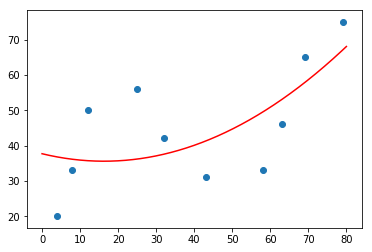

In [41]:
"""绘制拟合图像
"""
x_temp = np.array(x_temp).reshape(len(x_temp),1)
poly_x_temp = poly_features.fit_transform(x_temp)

plt.plot(x_temp, model.predict(poly_x_temp), 'r')
plt.scatter(x, y)

In [42]:
#!wget http://labfile.oss.aliyuncs.com/courses/1081/course-6-vaccine.csv
"""加载数据集
"""
import pandas as pd

df = pd.read_csv("course-6-vaccine.csv", header=0)
df

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892
5,1988,62.710162
6,1989,68.354736
7,1990,73.618808
8,1991,69.748838
9,1992,69.905091


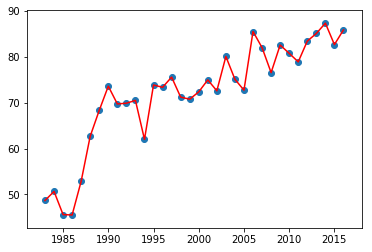

In [43]:
"""数据绘图
"""
# 定义 x, y 的取值
x = df['Year']
y = df['Values']
# 绘图
plt.plot(x, y, 'r')
plt.scatter(x, y)

In [44]:
"""训练集和测试集划分
"""
# 首先划分 dateframe 为训练集和测试集
train_df = df[:int(len(df)*0.7)] 
test_df = df[int(len(df)*0.7):]

# 定义训练和测试使用的自变量和因变量
train_x = train_df['Year'].values
train_y = train_df['Values'].values

test_x = test_df['Year'].values
test_y = test_df['Values'].values

In [45]:
"""线性回归预测
"""
# 建立线性回归模型
model = LinearRegression()
model.fit(train_x.reshape(len(train_x),1), train_y.reshape(len(train_y),1))
results = model.predict(test_x.reshape(len(test_x),1))
results # 线性回归模型在测试集上的预测结果

array([[81.83437635],
       [83.09935437],
       [84.36433239],
       [85.62931041],
       [86.89428843],
       [88.15926645],
       [89.42424447],
       [90.68922249],
       [91.95420051],
       [93.21917853],
       [94.48415655]])

In [46]:
"""线性回归误差计算
"""

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("线性回归平均绝对误差: ", mean_absolute_error(test_y, results.flatten()))
print("线性回归均方误差: ", mean_squared_error(test_y, results.flatten()))

线性回归平均绝对误差:  6.011979515629812
线性回归均方误差:  43.531858295153434


In [47]:
"""2 次多项式预测
"""
# 2 次多项式回归特征矩阵
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_train_x_2 = poly_features_2.fit_transform(train_x.reshape(len(train_x),1))
poly_test_x_2 = poly_features_2.fit_transform(test_x.reshape(len(test_x),1))

# 2 次多项式回归模型训练与预测
model = LinearRegression()
model.fit(poly_train_x_2, train_y.reshape(len(train_x),1)) # 训练模型

results_2 = model.predict(poly_test_x_2) # 预测结果

results_2.flatten() # 打印扁平化后的预测结果

array([71.98010746, 70.78151826, 69.38584368, 67.79308372, 66.00323838,
       64.01630767, 61.83229158, 59.45119011, 56.87300326, 54.09773104,
       51.12537344])

In [48]:
"""更高次多项式回归预测
"""
from sklearn.pipeline import make_pipeline

train_x = train_x.reshape(len(train_x),1)
test_x = test_x.reshape(len(test_x),1)
train_y = train_y.reshape(len(train_y),1)

for m in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(train_x, train_y)
    pre_y = model.predict(test_x)
    print("{} 次多项式回归平均绝对误差: ".format(m), mean_absolute_error(test_y, pre_y.flatten()))
    print("{} 次多项式均方根误差: ".format(m), mean_squared_error(test_y, pre_y.flatten()))
    print("---")

3 次多项式回归平均绝对误差:  4.547691928062872
3 次多项式均方根误差:  29.93305654903162
---
4 次多项式回归平均绝对误差:  4.424336229004736
4 次多项式均方根误差:  29.0287490291125
---
5 次多项式回归平均绝对误差:  4.341616357696082
5 次多项式均方根误差:  28.221927572277085
---


MSE 计算结果:  [43.531858295153434, 464.3290384751541, 29.93305654903162, 29.0287490291125, 28.221927572277085, 27.4408216739516, 26.712320073299267, 26.038729630432552, 25.42241803715782, 24.86581841064246]


Text(0,0.5,'MSE')

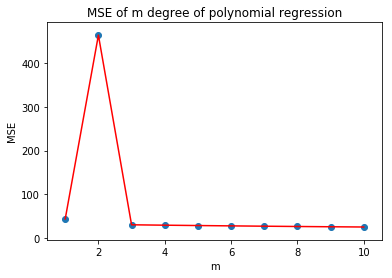

In [49]:
"""计算 m 次多项式回归预测结果的 MSE 评价指标并绘图
"""
mse = [] # 用于存储各最高次多项式 MSE 值
m = 1 # 初始 m 值
m_max = 10 # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(train_x, train_y) # 训练模型
    pre_y = model.predict(test_x) # 测试模型
    mse.append(mean_squared_error(test_y, pre_y.flatten())) # 计算 MSE
    m = m + 1

print("MSE 计算结果: ", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, 'r')
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial regression")
plt.xlabel("m")
plt.ylabel("MSE")